# Uber Data Analysis

#### Questions 

* Check how long do people travel with Uber?
* What Hour Do Most People Take Uber To Their Destination?
* Check The Purpose Of Trips
* Which Day Has The Highest Number Of Trips
* What Are The Number Of Trips Per Each Day?
* What Are The Trips In The Month
* The starting points of trips. Where Do People Start Boarding Their Trip From Most?

In [7]:
## import the packages
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import datetime
import calendar

In [31]:
data_ori = pd.read_csv('Uber_Drives.csv')

In [32]:
## Top 5 rows of the dataset
## Size of the dataset
display(data_ori.head(),data_ori.shape)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


(1156, 7)

In [33]:
data_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [34]:
## Is there any null in each columns?
## Total null values in each column
display(data_ori.isna().any(), data_ori.isnull().sum())

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [35]:
## dropping the nulls value
data = data_ori.copy()
data.dropna(inplace=True)

In [36]:
## convert the START_DATE* and END_DATE* type into datetime format
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format='%m/%d/%Y %H:%M')
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format='%m/%d/%Y %H:%M')

In [38]:
## extracting the value from START_DATE*
hour = []
day = []
month = []
dayofweek = []
weekday = []

for _ in data['START_DATE*']:
    hour.append(_.hour)
    day.append(_.day)
    month.append(_.month)
    dayofweek.append(_.dayofweek)
    weekday.append(calendar.day_name[dayofweek[-1]])

data['HOUR'] = hour
data['DAY'] = day
data['MONTH'] = month
data['DAY_OF_WEEK'] = dayofweek
data['WEEKDAY'] = weekday

In [39]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,MONTH,DAY_OF_WEEK,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,2,Wednesday


Business    647
Personal      6
Name: CATEGORY*, dtype: int64

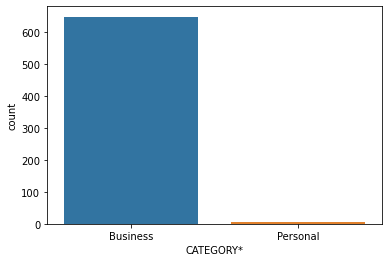

In [42]:
## Type of categories
display(data['CATEGORY*'].value_counts())
sb.countplot(data=data,x='CATEGORY*');
# Most people prefer Uber for Business occasion only

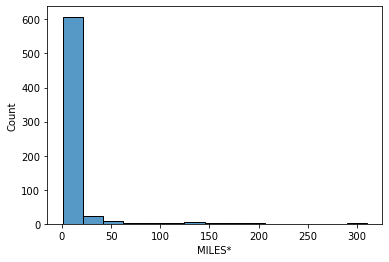

In [51]:
## How long do people travel with Uber?
sb.histplot(data['MILES*'], bins=15);
# Most people travel less than 25 miles to any destination

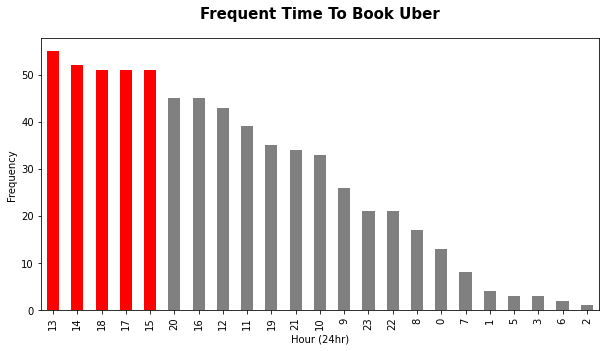

In [96]:
# What Hour Do Most People Take Uber To Their Destination?
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot.bar(figsize=(10,5), color=['red' if i<=4 else 'grey' for i in range(24)])
plt.xlabel('Hour (24hr)')
plt.ylabel('Frequency')
plt.title('Frequent Time To Book Uber', y=1.05, fontsize=15,weight='bold');
# Most people book Uber at 13:00 to 20:00 pm.

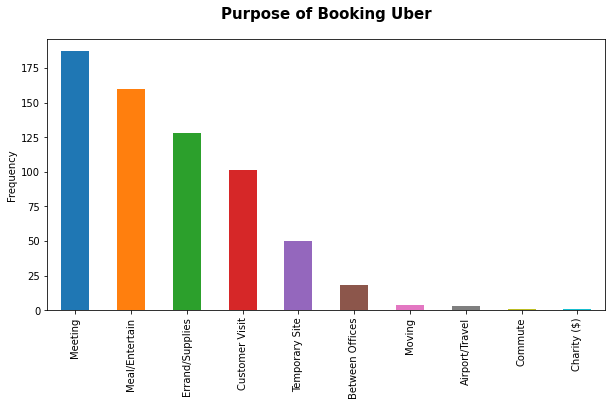

In [95]:
## Check The Purpose Of Trips
col = sb.color_palette()
data['PURPOSE*'].value_counts().plot.bar(figsize=(10,5), color=col);
plt.title('Purpose of Booking Uber', y=1.05, fontsize=15,weight='bold');
plt.ylabel('Frequency');
# Now we know that most of people book Uber for Meeting and Meal/Entertaiment
# We can provide discount for this purpose as to boost the sales/booking
# Example for next meeting when booking with Uber, there is a discount etc.

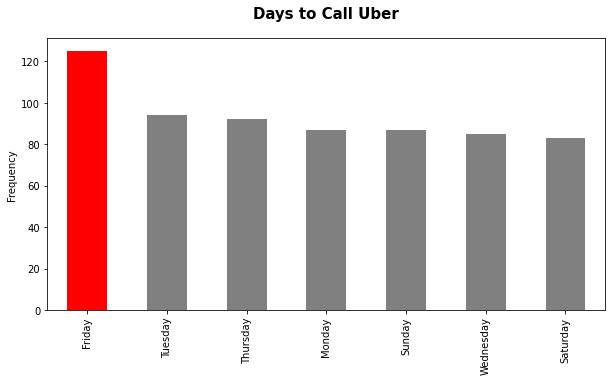

In [123]:
## Which Day Has The Highest Number Of Trips
data['WEEKDAY'].value_counts().plot.bar(figsize=(10,5), color=['red' if x==0 else 'grey' for x in range(7)]);
plt.title('Days to Call Uber', y=1.05, fontsize=15,weight='bold');
plt.ylabel('Frequency');

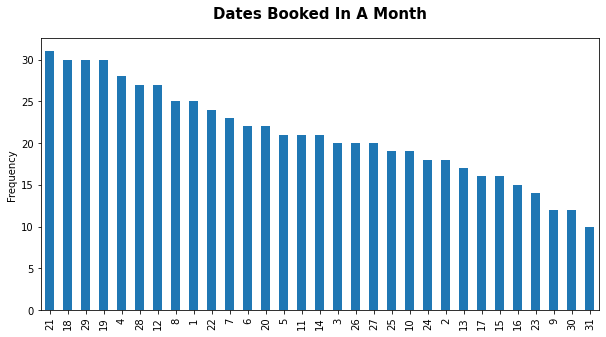

In [127]:
## What Are The Number Of Trips Per Each Day?
data['DAY'].value_counts().plot.bar(figsize=(10,5));
plt.title('Dates Booked In A Month', y=1.05, fontsize=15,weight='bold');
plt.ylabel('Frequency');

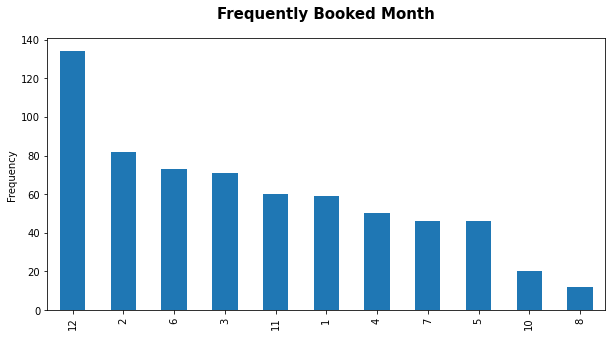

In [129]:
## What Are The Trips In The Month
data['MONTH'].value_counts().plot.bar(figsize=(10,5));
plt.title('Frequently Booked Month', y=1.05, fontsize=15,weight='bold');
plt.ylabel('Frequency');
# We can identify which month contribute a lot of revenue

'No. of places'

131

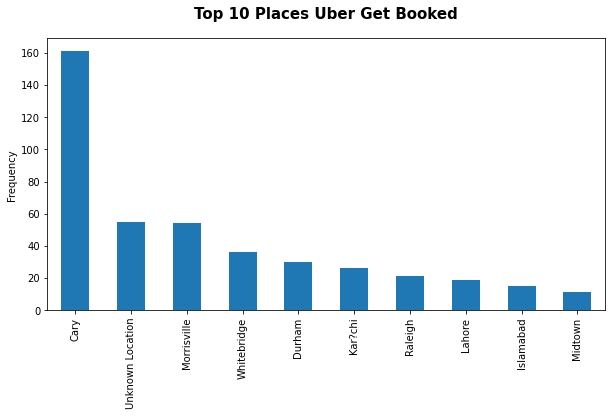

In [130]:
## The starting points of trips. Where Do People Start Boarding Their Trip From Most?
display('No. of places', data['START*'].unique().size)
data['START*'].value_counts()[:10].plot.bar(figsize=(10,5));
plt.title('Top 10 Places Uber Get Booked', y=1.05, fontsize=15,weight='bold');
plt.ylabel('Frequency');
# Top 10 places where people start booking the Uber

## Summary of analysis

1. Most people prefer Uber for the Business occasion only.
2. Most people travel less than 25 miles to any destination.
3. Most people book Uber from 1:00 to 8:00 pm.
4. Most people booked Uber for meeting/meal/entertainment purposes. We know that most people book Uber for meetings and Meal/Entertainment. We can provide a discount for this purpose to boost the sales/booking. For example, there is a discount for the next meeting when booking with Uber, etc.
5. Most people call Uber on Friday.
6. In 2016, December was the month that generated most of the revenues.
7. Cary Town in North Carolina has active Uber customers.